#### Installations

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


#### Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Load the dataset of medical images.

In [3]:
png_images = ['./png/Image1.png', './png/Image2.png', './png/Image3.png', './png/Image4.png']
test_images = png_images.copy()

In [4]:
def ImageReader(images):
    
    # Reader
    reader = []
    for i in images:
        img = cv2.imread(i)
        reader.append(img)
        
    return reader

In [5]:
def displayer(images):
    
    # Displayer
    for img in images:
        plt.imshow(img)
        plt.show()

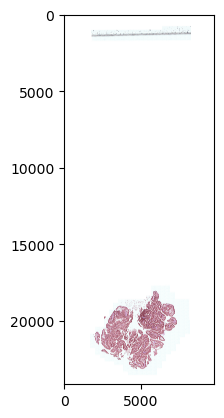

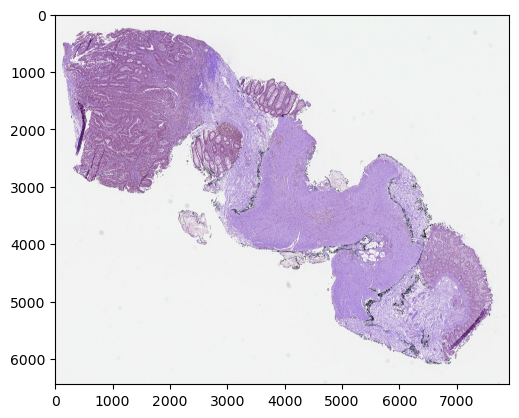

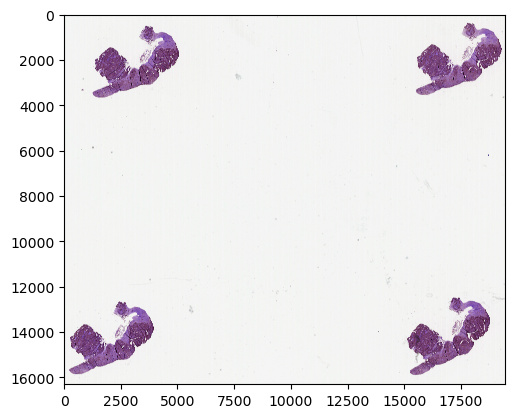

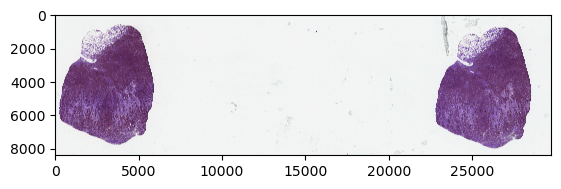

In [6]:
images = ImageReader(png_images)
displayer(images)

## Functions to perform Data Augmentation

#### Image rotation

In [7]:
def rotate_image(image, angle):
    
    # get dimensions
    height, width = image.shape[:2]

    # calculate center 
    center = (width / 2, height / 2)

    # define rotation matrix
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # apply rotation
    rotate = cv2.warpAffine(image, matrix, (width, height))

    return rotate

In [8]:
rotate = rotate_image(images[1], 45)

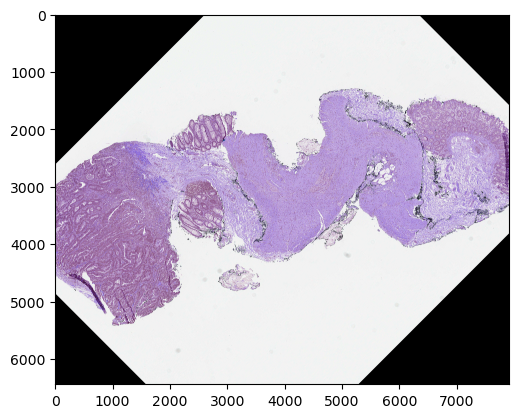

In [9]:
plt.imshow(rotate)
plt.show()

#### Image flipping

In [10]:
def flip_image(image, orientation):
    
    # side ==> 1 : Horizontal, 0: Vertical, -1: Both 
    flip = cv2.flip(image, orientation)
    return flip

In [11]:
flip = flip_image(images[1], 1)

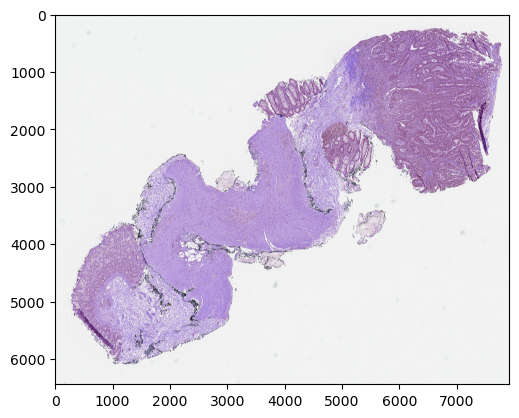

In [12]:
plt.imshow(flip)
plt.show()

#### Image scaling

In [13]:
def scale_image(image, factor):

    # get shapes
    height, width = image.shape[0], image.shape[1]
    factor = factor / 100
    
    # calculate updated dimensions
    height, width = int(height * factor), int(width * factor)

    # resizing
    scale = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

    return scale

In [14]:
scale = scale_image(images[3], 200)

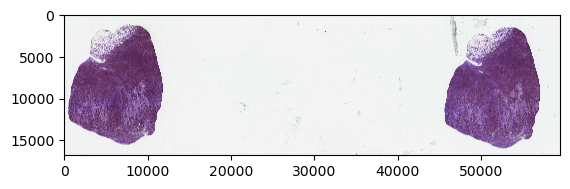

In [15]:
plt.imshow(scale)
plt.show()

#### Image cropping

In [16]:
def crop_image(image, x, y, width, height):

    # region of interest
    crop = image[y:y+height, x:x+width]

    return crop

In [17]:
crop = crop_image(images[3], 100, 1000, 7000, 7000)

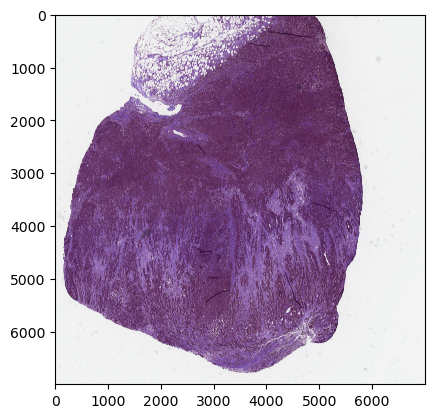

In [18]:
plt.imshow(crop)
plt.show()

#### Image brightness adjustment

In [19]:
def adjust_brightness(image, brightness):

    # Convert BGR to HSV color
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # spliting color channels
    h, s, v = cv2.split(hsv)

    # adding brightness
    v = cv2.add(v, brightness)

    # merge color channels
    hsv = cv2.merge((h, s, v))

    # Convert HSV to BGR color
    adjusted_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return adjusted_image

In [20]:
adjusted_image = adjust_brightness(images[1], -200)

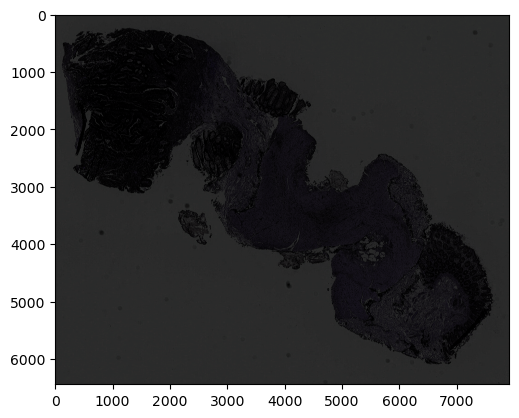

In [21]:
plt.imshow(adjusted_image)
plt.show()

#### Data Augmentation

In [22]:
def Augmentation(image, angle, orientation, factor, x, y, width, height, brightness):
        
    rotated = rotate_image(image, angle)
    flipped = flip_image(rotated, orientation)
        
    scaled = scale_image(flipped, factor)
    cropped = crop_image(scaled, x, y, width, height)
    
    brighted = adjust_brightness(cropped, brightness)
    
    return brighted

## Main

In [23]:
def main(multiple_images):
    
    images = ImageReader(multiple_images)
    print("Total Images : ", len(images))
    updated = []
    
    angle = 30
    orientation = 1
    factor = 20
    x, y, width, height = 100, 1000, 7000, 7000
    brightness = 200
        
    for index, img in enumerate(images):
        
        i = Augmentation(img, angle, orientation, factor, x, y, width, height, brightness)
        cv2.imwrite(str(index + 1) + '_updated.png', i)
        updated.append(i)
    
        print("Images Processed : ", index + 1)
        
    return updated

In [24]:
updated = main(test_images)

Total Images :  4
Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4


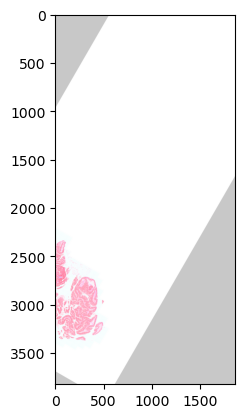

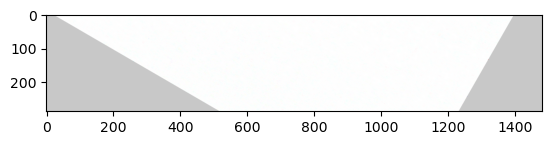

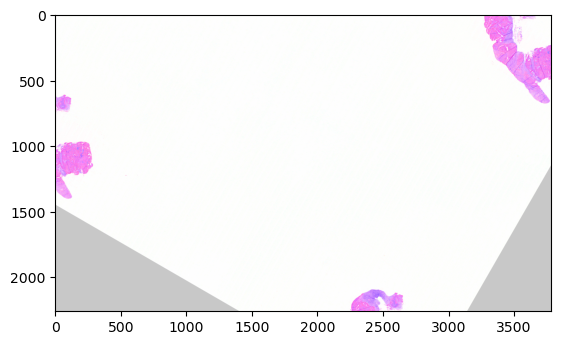

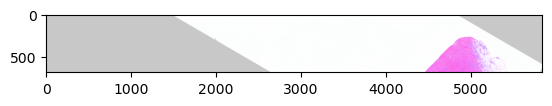

In [25]:
displayer(updated)